In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

# Step 1: Upload the dataset
uploaded = files.upload()

# Step 2: Load the dataset (assuming the uploaded file is named 'Iris.csv')
data = pd.read_csv(next(iter(uploaded)))

Saving Iris.csv to Iris.csv


In [2]:
# Step 3: Inspect the data structure
print(data.head())

# Step 4: Split the data into features and target
X = data.drop(columns=['Species'])
y = data['Species']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



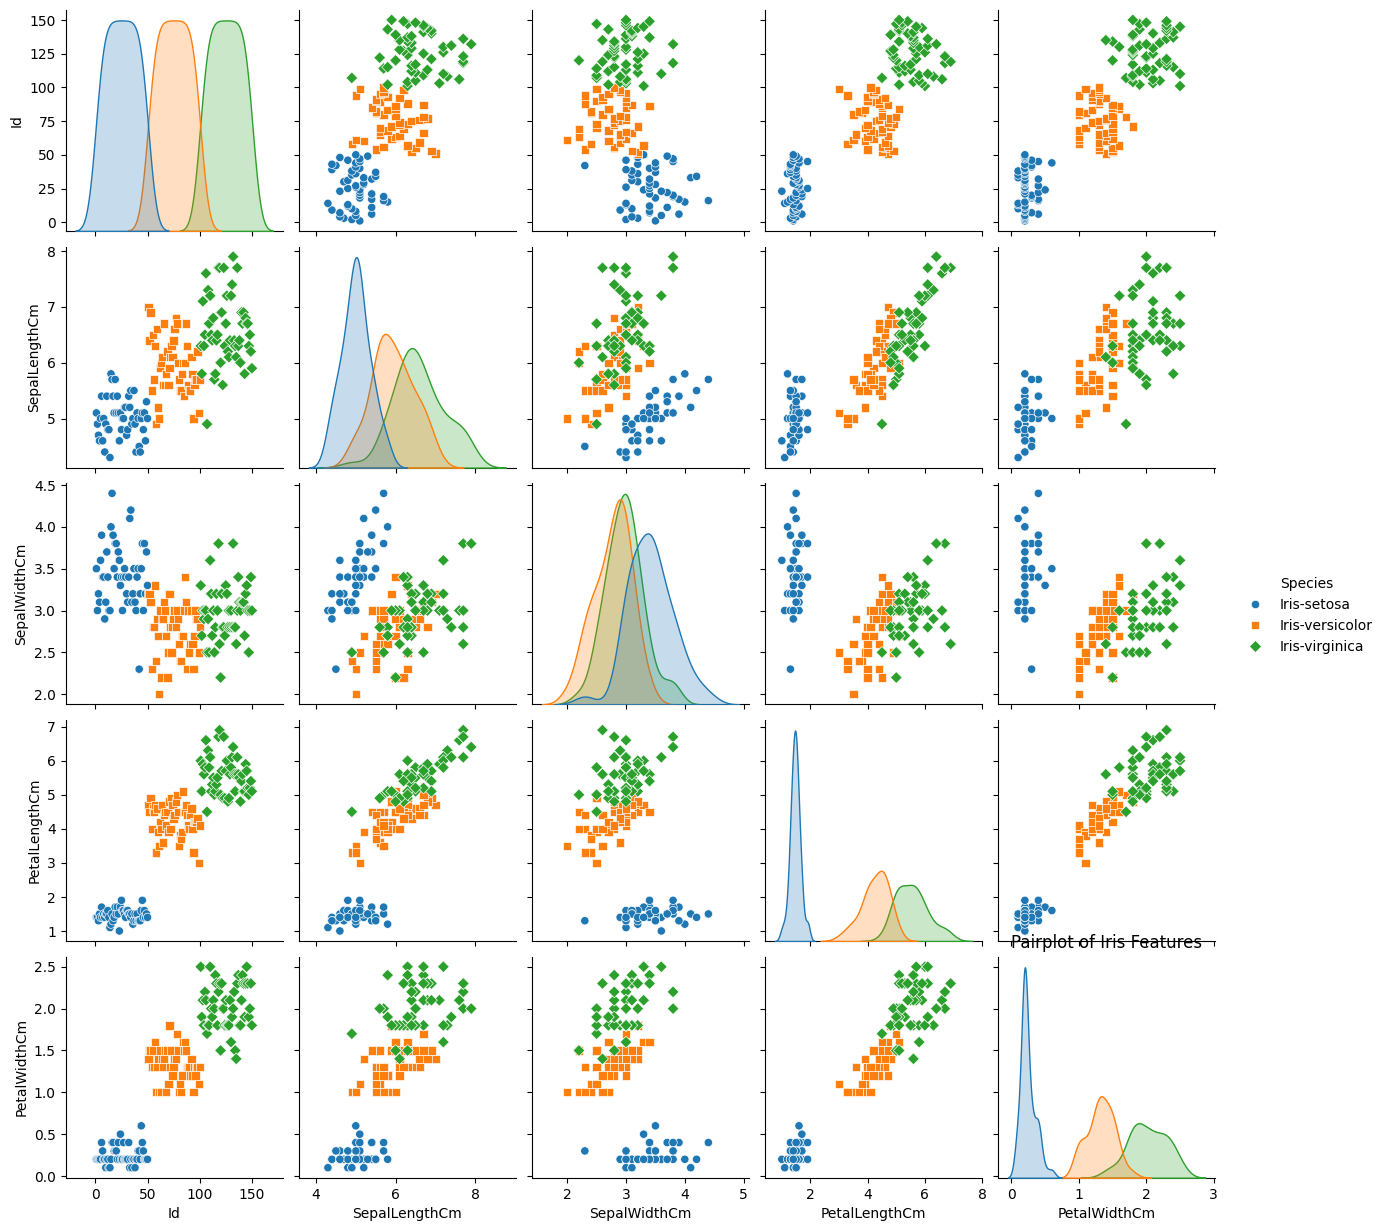

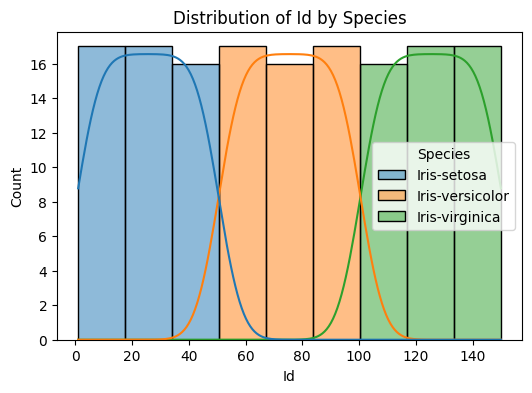

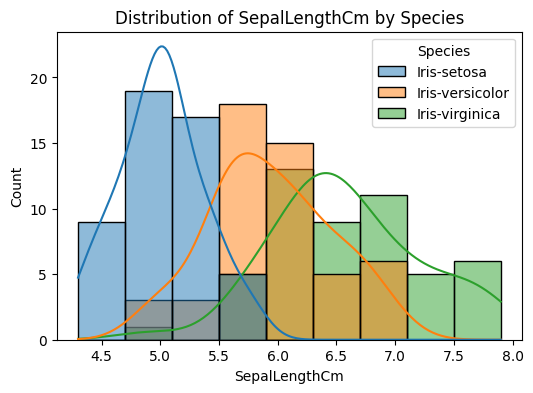

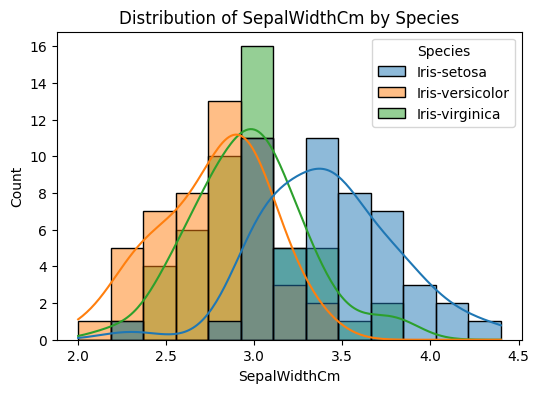

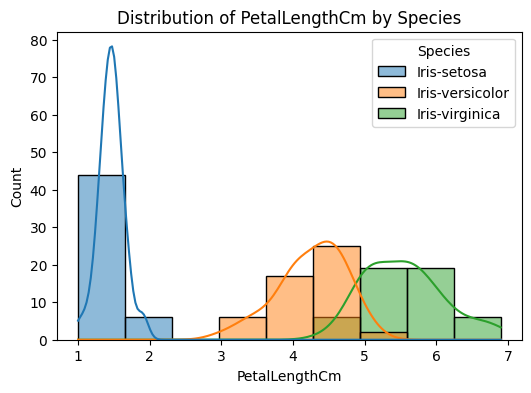

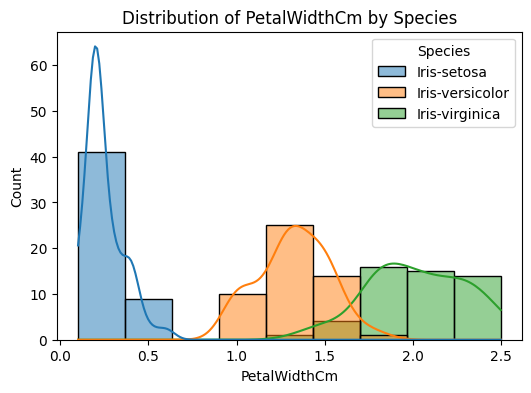

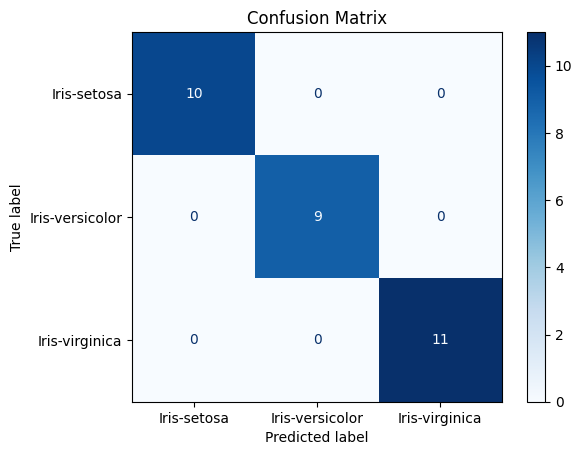

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualize the pairplot to see the relationship between different features
sns.pairplot(data, hue="Species", markers=["o", "s", "D"])
plt.title("Pairplot of Iris Features")
plt.show()

# Visualize the distribution of each feature for different species
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data, x=column, hue="Species", kde=True)
    plt.title(f"Distribution of {column} by Species")
    plt.show()


# After model prediction: Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
